In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split

In [2]:
#create a dataset
import sklearn.datasets as skd
X, y = skd.make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.6)

In [3]:
#finding the number of unique classes and samples
unique, counts = np.unique(y, return_counts = True)
unique, counts

(array([0, 1]), array([50, 50]))

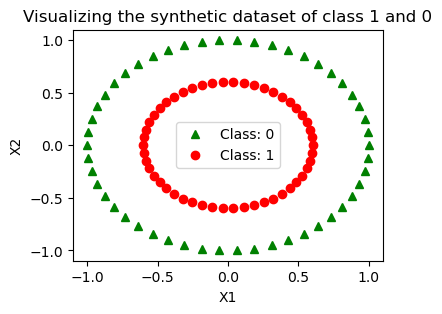

In [4]:
import matplotlib.pyplot as plt
#Visualising the dataset
plt.figure(figsize = (4, 3))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^', label='Class: 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro' , label="Class: 1")
plt.title("Visualizing the synthetic dataset of class 1 and 0")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [5]:
#converting the datset into tensor dataset
inputs = torch.tensor(X, dtype = torch.float32)
targets = torch.tensor(y)
dataset = TensorDataset(inputs, targets)

In [6]:
#train, test and validation set foramtion
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

total_size = len(dataset)
train_size = int(train_ratio * total_size)
test_size = int(test_ratio * total_size)
val_size = int(val_ratio * total_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

#finding the number of features in dataset
data, label = next(iter(train_dataset))
n_features = data.shape[0]
n_targets = len(torch.unique(targets, return_counts = True))
n_features, n_targets

(2, 2)

In [7]:
#Define the neural network for classifier
class BinaryClassification(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(BinaryClassification, self).__init__()
        self.fc1 = nn.Linear(n_inputs, 100)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()
        self.fc2 = nn.Linear(100, 200)
        self.fc3 = nn.Linear(200, 100)
        self.fc4 = nn.Linear(100, n_outputs)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
    
        return x
        

In [8]:
#Creating the model and loss optimzer
model = BinaryClassification(n_inputs = 2, n_outputs = 2)
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [9]:
#Batch processing for training, validation and testset
train_loader = DataLoader(train_dataset, batch_size = 10, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 10, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = 10, shuffle = False)

In [10]:
#function to compute the accuracy
def compute_accuracy(model, data_loader):
    model.eval() #set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad(): #Do not need to calculate gradient as its not training, would make the execution faster
        for data, labels in data_loader: #take a batch at a time
            output = model(data)
            _, predicted = torch.max(output, 1) # (output, 1 -indicate columns) return max_value, index (we only need the index)
            total += labels.size(0)  #gives the number of labels in the batch, which is added to total to keep track of the total number of evaluated samples.
            correct += (predicted == labels).sum().item() #sum() counts the number of True values, which is the number of correct predictions in the batch; 
                                                          #item() converts the result to a Python integer, which is added to the correct counter.
        return 100 * correct/total


In [11]:
# Lists to store loss and accuracy for each epoch
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

#trinning loop
for epoch in range(100):
    model.train() #set the model to training mode
    running_loss = 0.0
    for data, labels in train_loader:
        optimizer.zero_grad() #clear the grading for each batch
        output = model(data) #forward pass
        loss = criterion(output, labels) #calculating the loss for the batch
        loss.backward() #backpropagation
        optimizer.step() #update the models weight
        running_loss += loss.item() #adding the batch loss to total loss
        
    #calulating average training loss and accuracy
    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = compute_accuracy(model, train_loader)
    
    #validation loop
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for data, labels in val_loader:
            output = model(data)
            loss = criterion(output, labels)
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_accuracy = compute_accuracy(model, val_loader)
    
    #appending the current value to the list
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch +1}, Trainning Loss:{avg_train_loss: .2f}, Validation Loss: {avg_val_loss: .2f}, Train Accuracy: {train_accuracy: .2f}, Val Accuracy: {val_accuracy: .2f}")
        
        


Epoch 1, Trainning Loss: 0.69, Validation Loss:  0.68, Train Accuracy:  45.71, Val Accuracy:  65.00
Epoch 2, Trainning Loss: 0.69, Validation Loss:  0.68, Train Accuracy:  44.29, Val Accuracy:  70.00
Epoch 3, Trainning Loss: 0.69, Validation Loss:  0.69, Train Accuracy:  52.86, Val Accuracy:  60.00
Epoch 4, Trainning Loss: 0.69, Validation Loss:  0.69, Train Accuracy:  51.43, Val Accuracy:  55.00
Epoch 5, Trainning Loss: 0.69, Validation Loss:  0.69, Train Accuracy:  58.57, Val Accuracy:  70.00
Epoch 6, Trainning Loss: 0.69, Validation Loss:  0.69, Train Accuracy:  71.43, Val Accuracy:  70.00
Epoch 7, Trainning Loss: 0.69, Validation Loss:  0.69, Train Accuracy:  70.00, Val Accuracy:  65.00
Epoch 8, Trainning Loss: 0.69, Validation Loss:  0.69, Train Accuracy:  65.71, Val Accuracy:  65.00
Epoch 9, Trainning Loss: 0.69, Validation Loss:  0.69, Train Accuracy:  58.57, Val Accuracy:  50.00
Epoch 10, Trainning Loss: 0.69, Validation Loss:  0.69, Train Accuracy:  55.71, Val Accuracy:  40.00

Epoch 96, Trainning Loss: 0.62, Validation Loss:  0.64, Train Accuracy:  87.14, Val Accuracy:  85.00
Epoch 97, Trainning Loss: 0.62, Validation Loss:  0.64, Train Accuracy:  87.14, Val Accuracy:  85.00
Epoch 98, Trainning Loss: 0.62, Validation Loss:  0.63, Train Accuracy:  87.14, Val Accuracy:  85.00
Epoch 99, Trainning Loss: 0.61, Validation Loss:  0.63, Train Accuracy:  88.57, Val Accuracy:  90.00
Epoch 100, Trainning Loss: 0.61, Validation Loss:  0.63, Train Accuracy:  88.57, Val Accuracy:  90.00


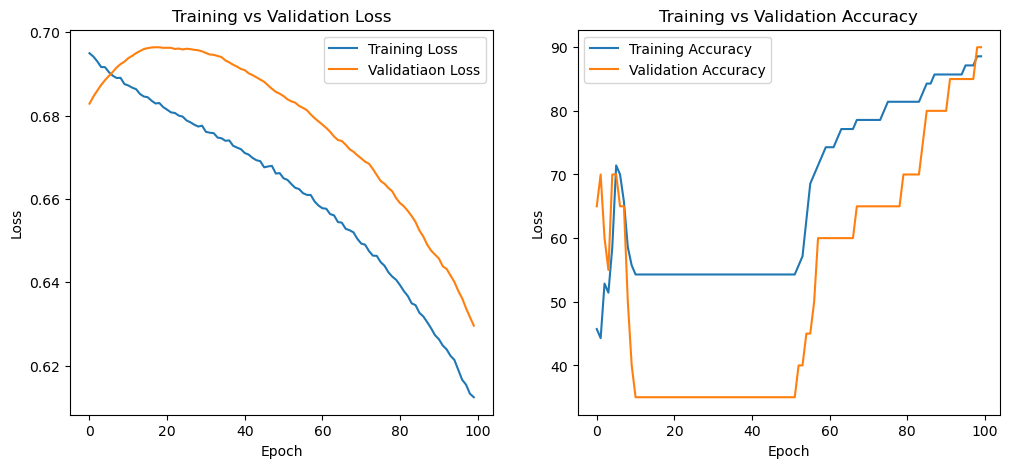

In [12]:
plt.figure(figsize = (12, 5))
#plotting the loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label = "Training Loss")
plt.plot(val_losses, label = "Validatiaon Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label = "Training Accuracy")
plt.plot(val_accuracies, label = "Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
# Models performance on the test set
y_pred = []
y_test = []
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for data, labels in test_loader:
        output = model(data) #forward pass
        _, predicted = torch.max(output, 1)
        y_pred.extend(predicted.tolist())
        y_test.extend(labels.tolist())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    accuracy = 100 * correct / total
    print(f'Accrucy on the test set: {accuracy:.2f}')
        

Accrucy on the test set: 70.00


In [14]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



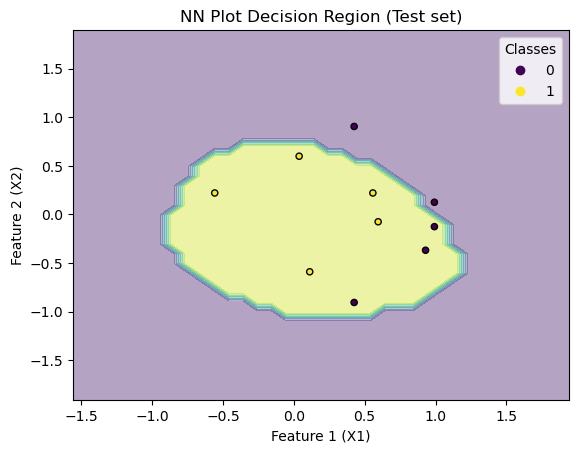

In [15]:
test = []
for data, label in test_loader:
    test.extend([data, label])
#print(test)
X_test, y_test = test

model.eval()  # Set the model to evaluation mode

# Create a mesh to plot in
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict classes for each point in the mesh
Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
Z = torch.max(Z, 1)[1].numpy()
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
scatter_test = plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k', s=20)
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.legend(*scatter_test.legend_elements(), title="Classes")
plt.title("NN Plot Decision Region (Test set)")

plt.show()